## Gráficos de las infidelidades obtenidas en la estimación del estado puro con ruido blanco. Estado débilmente mixto.

Datos1 corresponden a las simulaciones con distribución 1/3,1/3,1/3 y lamda del orden 10^{-3}.

In [19]:
import numpy as np
import pandas as pd
from collections import defaultdict

import matplotlib.pyplot as plt ## para graficar
from scipy.optimize import curve_fit ## ajuste de curva

### 1. Cargar datos de las simulaciones

In [20]:
dimensiones = np.array([4,8,16,32,64])
potencias = np.array([5 , 5.5 , 6 , 6.5 , 7])

# Diccionario anidado: datos[d][n] = DataFrame
datos_fid1 = defaultdict(dict)
datos_fid2 = defaultdict(dict)

for d in dimensiones:
    for n in potencias:
        archivo1 = f'lamda-0/d={d},N={n},fid1.csv'
        archivo2 = f'lamda-0/d={d},N={n},fid2.csv'
        try:
            df1 = pd.read_csv(archivo1)
            datos_fid1[d][n] = df1

            df2 = pd.read_csv(archivo2)
            datos_fid2[d][n] = df2

        except FileNotFoundError:
            print(f'⚠️ Archivo no encontrado: {archivo1}')

## 2. Crear arrays 

Ensamble vs Infidelidad

In [21]:
## Primera etapa

fid1_means_N = {}  # fid1_means[d] = lista de promedios para cada n
fid1_stds_N = {}   # fid1_stds[d] = lista de desviaciones estándar para cada n

for d in dimensiones:
    fid1_means_N[d] = []
    fid1_stds_N[d] = []
    
    for n in potencias:
        datos = datos_fid1[d][n]['Mean'].values
        fid1_means_N[d].append(np.mean(datos))
        fid1_stds_N[d].append(np.std(datos))

## Segunda etapa

fid2_means_N = {}  # fid1_means[d] = lista de promedios para cada n
fid2_stds_N = {}   # fid1_stds[d] = lista de desviaciones estándar para cada n

for d in dimensiones:
    fid2_means_N[d] = []
    fid2_stds_N[d] = []
    
    for n in potencias:
        datos = datos_fid2[d][n]['Mean'].values
        fid2_means_N[d].append(np.mean(datos))
        fid2_stds_N[d].append(np.std(datos))


Dimension vs Infidelidad

In [22]:
## Primera etapa

fid1_means_d = {}  # fid1_means[n] = lista de promedios para cada d
fid1_stds_d = {}   # fid1_stds[n] = lista de desviaciones estándar para cada d

for n in potencias:
    fid1_means_d[n] = []
    fid1_stds_d[n] = []
    
    for d in dimensiones:
        datos = datos_fid1[d][n]['Mean'].values
        fid1_means_d[n].append(np.mean(datos))
        fid1_stds_d[n].append(np.std(datos))

## Segunda etapa

fid2_means_d = {}  # fid1_means[n] = lista de promedios para cada d
fid2_stds_d = {}   # fid1_stds[n] = lista de desviaciones estándar para cada d

for n in potencias:
    fid2_means_d[n] = []
    fid2_stds_d[n] = []
    
    for d in dimensiones:
        datos = datos_fid2[d][n]['Mean'].values
        fid2_means_d[n].append(np.mean(datos))
        fid2_stds_d[n].append(np.std(datos))

## 3. Gráficos 

In [23]:
## Función de cota de Gill-Massar

def GM( dimension , ensamble):
    return (dimension-1)/ (ensamble)

colores = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

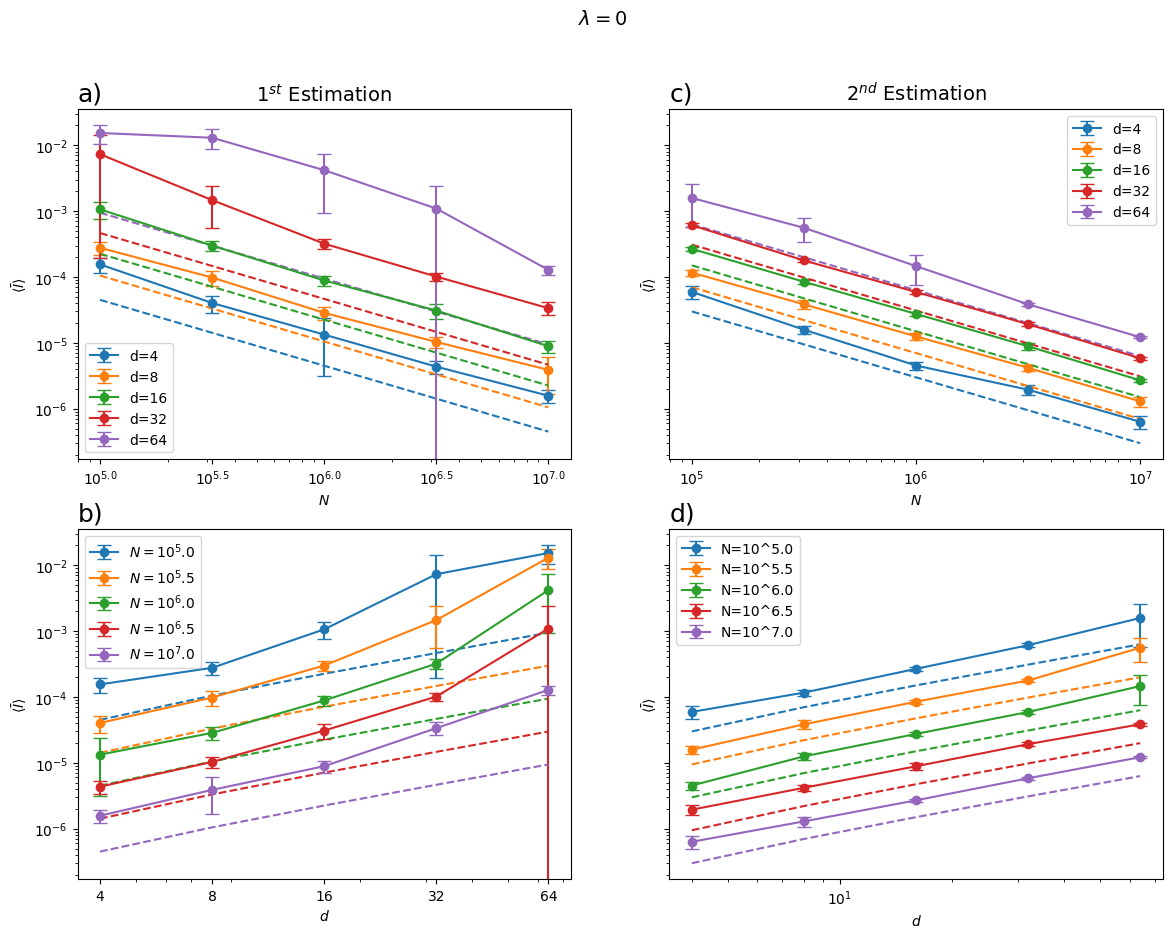

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10) , sharey=True)
fig.suptitle(r"$\lambda = 0$", fontsize=14)

## Grafico de la izquierda

i = 0
for d in dimensiones:
    axs[0 , 0].errorbar(10**potencias, np.ones(len(potencias))-fid1_means_N[d], yerr=fid1_stds_N[d], color = colores[i], label=f'd={d}', marker='o', capsize=5)
    axs[0 , 0].plot( 10**potencias , GM(d , 2/3*10**potencias), color = colores[i], linestyle='--')
    i += 1

axs[0 , 0].set_xlabel('Potencia N')
axs[0 , 0].set_ylabel('Fidelidad media')
axs[0 , 0].set_title('Fidelidad media primera etapa vs N para diferentes d')

axs[0 , 0].set_xscale('log')  # escala logarítmica en eje x
axs[0 , 0].set_yscale('log') 

axs[0 , 0].set_xlabel('$N$')
axs[0 , 0].set_ylabel(r'$ \langle\bar{I}\rangle $')
axs[0, 0].set_title('a)', loc='left', fontsize='18')
axs[0 , 0].set_title('$1^{st}$ Estimation', fontsize='14')

axs[0 , 0].set_xticks(10**potencias) 
axs[0 , 0].set_xticklabels([fr'$10^{{{n}}}$' for n in potencias], fontsize=10)

axs[0 , 0].legend()
axs[0 , 0].grid(False)


## Grafico de la derecha

i = 0
for d in dimensiones:
    axs[0 , 1].errorbar(10**potencias, np.ones(len(potencias))-fid2_means_N[d], yerr=fid2_stds_N[d], color = colores[i], label=f'd={d}', marker='o', capsize=5)
    axs[0 , 1].plot( 10**potencias , GM(d , 10**potencias), color = colores[i], linestyle='--')
    i += 1

axs[0 , 1].set_xlabel('Potencia N')
axs[0 , 1].set_ylabel('Fidelidad media')
axs[0 , 1].set_title('Fidelidad media final vs N para diferentes d')

axs[0 , 1].set_xscale('log')  # escala logarítmica en eje x
axs[0 , 1].set_yscale('log') 

axs[0 , 1].set_xlabel('$N$')
axs[0 , 1].set_ylabel(r'$ \langle\bar{I}\rangle $')
axs[0 , 1].set_title('c)', loc='left', fontsize='18')
axs[0 , 1].set_title('$2^{nd}$ Estimation', fontsize='14')

axs[0 , 0].set_xticks(10**potencias) 
axs[0 , 0].set_xticklabels([fr'$10^{{{n}}}$' for n in potencias], fontsize=10)


axs[0 , 1].legend()
axs[0 , 1].grid(False)

##############################################################################################################

## Grafico de arriba

i = 0
for n in potencias:
    axs[ 1 , 0 ].errorbar(dimensiones, np.ones(len(dimensiones))-fid1_means_d[n], yerr=fid1_stds_d[n], color = colores[i], label=fr'$N=10^{n}$', marker='o', capsize=5)
    axs[ 1 , 0 ].plot( dimensiones , GM(dimensiones , 2/3*10**n), color = colores[i], linestyle='--')
    i += 1

axs[ 1 , 0 ].set_xlabel('$d$')
axs[ 1 , 0 ].set_ylabel(r'$ \langle\bar{I}\rangle $')
axs[ 1 , 0].set_title('b)', loc='left', fontsize='18')

axs[ 1 , 0 ].set_xscale('log')  # escala logarítmica en eje x
axs[ 1 , 0 ].set_yscale('log') 

axs[1 , 0].set_xticks(dimensiones) 
axs[1 , 0].set_xticklabels(dimensiones, fontsize=10)

axs[ 1 , 0 ].legend()
axs[ 1 , 0 ].grid(False)

## Grafico de abajo

i = 0
for n in potencias:
    axs[1 , 1].errorbar(dimensiones, np.ones(len(dimensiones))-fid2_means_d[n], yerr=fid2_stds_d[n], color = colores[i], label=f'N=10^{n}', marker='o', capsize=5)
    axs[1 , 1].plot( dimensiones , GM(dimensiones , 10**n), color = colores[i], linestyle='--')
    i += 1

axs[1 , 1].set_xlabel('$d$')
axs[1 , 1].set_ylabel(r'$ \langle\bar{I}\rangle $')
axs[1 , 1].set_title('d)', loc='left', fontsize='18')

axs[1 , 1].set_xscale('log')  # escala logarítmica en eje x
axs[1 , 1].set_yscale('log') 

axs[1 , 0].set_xticks(dimensiones) 
axs[1 , 0].set_xticklabels(dimensiones, fontsize=10)

axs[1 , 1].legend()
axs[1 , 1].grid(False)

plt.savefig('lamda0-MIN-V2.pdf', bbox_inches='tight')


## 4. Ajustes de Curva

Realizamos ajustes de curva de los datos graficados considerando el modelo
$$

I = \alpha \frac{(2(d-1)+1)^{2\gamma}}{(4N(d-1))^\beta}.

$$

Para encontrar los valores de $\beta,\gamma$ realizamos ajustes de curva lineal considerando el logaritmo de la función anterior,
$$
log_{10}(I) = log_{10}(\alpha) - \beta log_{10}(N) + \gamma log_{10}(d-1).
$$
Para los ajustes de $\beta$, fijamos los valores del ensamble. Para los ajustes de $\gamma$ fijamos el valor de la dimensión. Finalmente para el ajuste de $\alpha$ consideramos el promedio de los valores ajustados.

### 4.1 Para cada dimensión ajustar curva ensamble vs infidelidad. Encontramos los valores de $\beta$.

In [25]:
betas = []

for d in dimensiones:
    xdata = potencias
    ydata = np.log10(np.ones(len(potencias))-fid2_means_N[d])

    params , cov = np.polyfit(xdata, ydata, 1, cov=True)  # grado 1 = lineal

    a_fit , b_fit = params
    betas.append(a_fit)

    a_err , b_err = np.sqrt(np.diag(cov))

    #### Grafico del ajuste ###############

    #y_fit = a_fit * xdata + b_fit

    #plt.plot(xdata, ydata, 'o', label='Datos')
    #plt.plot(xdata, y_fit, '--', label=f'alpha={a_fit:.2f},std={a_err:.3f}')
    #plt.legend()
    #plt.grid(True)
    #plt.title('Ajuste lineal con numpy')
    #plt.show()

    ########################################

    print(f'd={d}, beta={a_fit}, std={a_err}')

print(f'Mean beta = {np.mean(betas)}')


d=4, beta=-0.9706514652967211, std=0.04286170748315828
d=8, beta=-0.9746187259958948, std=0.006216914568986068
d=16, beta=-0.9940257041659033, std=0.005545802499408143
d=32, beta=-1.001187781691185, std=0.010293041191513577
d=64, beta=-1.0772313363979171, std=0.025893977934825303
Mean beta = -1.0035430027095242


### 4.2 Para cada ensamble ajustar curva dimension vs infidelidad. Encontramos los valores de $\gamma$.

In [26]:
gammas = []

for n in potencias:
    xdata = np.log10(dimensiones-1)
    ydata = np.log10(np.ones(len(dimensiones))-fid2_means_d[n])

    params , cov = np.polyfit(xdata, ydata, 1, cov=True)  # grado 1 = lineal

    a_fit , b_fit = params
    gammas.append(a_fit)

    a_err , b_err = np.sqrt(np.diag(cov))

    ### Gráfico del ajuste ################################

    #y_fit = a_fit * xdata + b_fit

    #plt.plot(xdata, ydata, 'o', label='Datos')
    #plt.plot(xdata, y_fit, '--', label=f'alpha = {a_fit:.2f} , std={a_err:.3f}')
    #plt.legend()
    #plt.grid(True)
    #plt.title('Ajuste lineal con numpy')
    #plt.show()

    #######################################################

    print(f'N={n}, gamma={a_fit}, std={a_err}')

print(f'Mean gamma = {np.mean(gammas)}')

N=5.0, gamma=1.0814257889559453, std=0.05846282002212726
N=5.5, gamma=1.1397601413205, std=0.06292918014300937
N=6.0, gamma=1.1216953467222548, std=0.02363560109585378
N=6.5, gamma=0.9885593967028979, std=0.016073760366208684
N=7.0, gamma=0.9777649739548158, std=0.026836023237347083
Mean gamma = 1.0618411295312828


### 4.3 Realizar cruvefit para encontrar los valores de $\alpha$ usando como valores de $\beta$ y $\gamma$ el promedio de los valores encontrados en los ajustes anteriores.

In [27]:
## ajuste por dimension
## Recordar que para la primera etapa, N -> 2N/3

alphas = []

for d in dimensiones:

    xdata = potencias
    ydata = np.ones(len(potencias))-fid2_means_N[d]

    def modelo(potencia , alpha):
        return alpha*(d-1)**(1)/((10**potencia))**(1)
    
    params, cov = curve_fit(modelo, xdata, ydata)

    alphas.append(params)

    print(f'd={d} , alpha={params} , std={np.sqrt(cov)[0]}')

print(f'Mean alpha = {np.mean(alphas)}')

d=4 , alpha=[1.94739474] , std=[0.04865777]
d=8 , alpha=[1.67264806] , std=[0.01236981]
d=16 , alpha=[1.78343257] , std=[0.00278341]
d=32 , alpha=[1.95634409] , std=[0.02184092]
d=64 , alpha=[2.5346216] , std=[0.04415637]
Mean alpha = 1.9788882117768243
